# Setting up Kaggle



In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 7.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=14dc0a4d6d69cfc441051f06343d584e12aa0b92d5e6bad8719b9244c5502a3f
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"insatanic","key":"84e54b88ddc3f0018d67d54129b53b61"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/ 

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              215KB  2021-03-10 12:43:30            193         29  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            193         32  0.8125           
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            313         46  1.0              
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays TFRecords    

In [ ]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:33<00:00, 21.4MB/s]
100% 2.29G/2.29G [00:33<00:00, 73.3MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip -d dataset

# CNN Model


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
training_path = "/content/dataset/chest_xray/chest_xray/train"
testing_path = "/content/dataset/chest_xray/chest_xray/test"

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    image_size = (200,200),
    batch_size = 32
)

Found 5216 files belonging to 2 classes.


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    testing_path,
    image_size = (200,200),
    batch_size = 32
)

Found 624 files belonging to 2 classes.


In [ ]:
CNNmodel = tf.keras.models.Sequential()

# Feature Extraction part
CNNmodel.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
CNNmodel.add(tf.keras.layers.MaxPool2D(2,2))
CNNmodel.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))
CNNmodel.add(tf.keras.layers.MaxPool2D(2,2))
CNNmodel.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))

# Neural Network - For classification
CNNmodel.add(tf.keras.layers.Flatten())
CNNmodel.add(tf.keras.layers.Dense(32, activation='relu'))
CNNmodel.add(tf.keras.layers.Dense(64, activation='relu'))
CNNmodel.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
CNNmodel.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ['accuracy'])

In [ ]:
history = CNNmodel.fit(train_dataset, validation_data=test_dataset, epochs = 15 )

Epoch 1/15
163/163 [==============================] - 42s 232ms/step - loss: 13.6163 - accuracy: 0.7540 - val_loss: 0.7505 - val_accuracy: 0.7596
Epoch 2/15
163/163 [==============================] - 38s 227ms/step - loss: 0.2184 - accuracy: 0.9343 - val_loss: 1.0927 - val_accuracy: 0.7532
Epoch 3/15
163/163 [==============================] - 38s 228ms/step - loss: 0.4651 - accuracy: 0.9085 - val_loss: 0.8747 - val_accuracy: 0.7804
Epoch 4/15
163/163 [==============================] - 38s 227ms/step - loss: 0.1331 - accuracy: 0.9556 - val_loss: 1.5899 - val_accuracy: 0.7644
Epoch 5/15
163/163 [==============================] - 39s 230ms/step - loss: 0.0729 - accuracy: 0.9705 - val_loss: 2.0970 - val_accuracy: 0.7500
Epoch 6/15
163/163 [==============================] - 39s 231ms/step - loss: 0.0421 - accuracy: 0.9849 - val_loss: 2.9411 - val_accuracy: 0.7532
Epoch 7/15
163/163 [==============================] - 39s 231ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 2.1986 - val_a

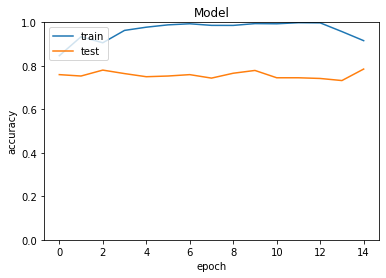

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0,1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Solving Overfittinng with Data Augmentation


In [ ]:
#Use ImageDataGenerator to do augmentation
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range=[0.5,1.5],
    width_shift_range=0.3,
    height_shift_range=0.3, 
)

rotation_range=30, brightness_range=(0.1,0.9),shear_range=45, channel_shift_range=150 don't make much difference


width_shift_range=0.3, height_shift_range=0.3, zoom_range=[0.5,1.5] are good


In [ ]:
train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 420
)

Found 5216 images belonging to 2 classes.


In [ ]:
test_dataset_aug = dataGen.flow_from_directory(
    testing_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 420
)

Found 624 images belonging to 2 classes.


In [ ]:
CNNmodel_aug = tf.keras.models.Sequential()

# Feature extraction part
CNNmodel_aug.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))

# Neural network - For classification
CNNmodel_aug.add(tf.keras.layers.Flatten())
CNNmodel_aug.add(tf.keras.layers.Dense(32, activation='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(64, activation='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(2, activation='softmax'))

#Compile
CNNmodel_aug.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history2 = CNNmodel_aug.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 15)

Epoch 1/15
163/163 [==============================] - 95s 583ms/step - loss: 0.5412 - accuracy: 0.7239 - val_loss: 0.6997 - val_accuracy: 0.6298
Epoch 2/15
163/163 [==============================] - 94s 578ms/step - loss: 0.4426 - accuracy: 0.7975 - val_loss: 0.7429 - val_accuracy: 0.6843
Epoch 3/15
163/163 [==============================] - 94s 579ms/step - loss: 0.3537 - accuracy: 0.8420 - val_loss: 0.6852 - val_accuracy: 0.7436
Epoch 4/15
163/163 [==============================] - 94s 579ms/step - loss: 0.3231 - accuracy: 0.8574 - val_loss: 0.6397 - val_accuracy: 0.7003
Epoch 5/15
163/163 [==============================] - 94s 577ms/step - loss: 0.3225 - accuracy: 0.8435 - val_loss: 0.5438 - val_accuracy: 0.7692
Epoch 6/15
163/163 [==============================] - 94s 577ms/step - loss: 0.2899 - accuracy: 0.8684 - val_loss: 0.4336 - val_accuracy: 0.8301
Epoch 7/15
163/163 [==============================] - 94s 578ms/step - loss: 0.2546 - accuracy: 0.8909 - val_loss: 0.4768 - val_ac

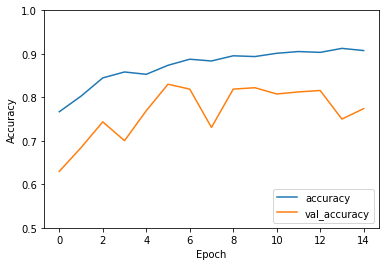

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

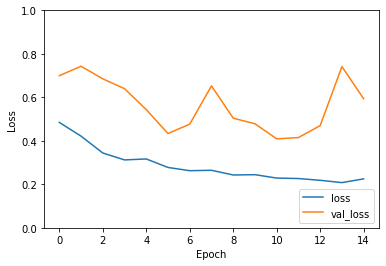

In [ ]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')